In [1]:
import pandas as pd
import numpy as np

In [2]:
from datetime import datetime
import matplotlib as mpl
import matplotlib.pylab
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 14

In [3]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [4]:
matplotlib.rc('font',family='NanumGothic')

In [5]:
# ! python -m pip install statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [6]:
df = pd.read_csv('./extremum_2021.csv', encoding='cp949')
df.head(5)

,p_name,date_d,average_c,max_c,max_c_t,min_c,min_c_t,difference_c
0,서울,1975-01-01,2.1,6.0,15:45,-0.8,8:00,6.8
1,서울,1975-02-01,-1.1,3.4,16:00,-5.0,3:48,8.4
2,서울,1975-03-01,0.0,7.1,15:38,-5.0,7:00,12.1
3,서울,1975-04-01,4.6,9.0,15:57,1.3,7:15,7.7
4,서울,1975-05-01,21.5,27.7,15:24,17.8,6:30,9.9


In [7]:
df_date = pd.date_range('19750101', '20210912', freq='MS')
df_date
len(df_date)

561

In [8]:
df['date'] = df_date
df

,p_name,date_d,average_c,max_c,max_c_t,min_c,min_c_t,difference_c,date
0,서울,1975-01-01,2.1,6.0,15:45,-0.8,8:00,6.8,1975-01-01
1,서울,1975-02-01,-1.1,3.4,16:00,-5.0,3:48,8.4,1975-02-01
2,서울,1975-03-01,0.0,7.1,15:38,-5.0,7:00,12.1,1975-03-01
3,서울,1975-04-01,4.6,9.0,15:57,1.3,7:15,7.7,1975-04-01
4,서울,1975-05-01,21.5,27.7,15:24,17.8,6:30,9.9,1975-05-01
...,...,...,...,...,...,...,...,...,...
556,서울,2021-05-01,10.2,15.3,12:56,8.5,23:26,6.8,2021-05-01
557,서울,2021-06-01,20.2,23.9,13:11,15.9,8:11,8.0,2021-06-01
558,서울,2021-07-01,26.3,31.0,15:25,21.4,5:19,9.6,2021-07-01
559,서울,2021-08-01,27.1,28.8,12:37,25.1,23:45,3.7,2021-08-01


In [9]:
dff = df[['date','average_c']]
dff = dff.set_index('date')
dff

,average_c
date,
1975-01-01,2.1
1975-02-01,-1.1
1975-03-01,0.0
1975-04-01,4.6
1975-05-01,21.5
...,...
2021-05-01,10.2
2021-06-01,20.2
2021-07-01,26.3


Text(0, 0.5, 'Celcius')

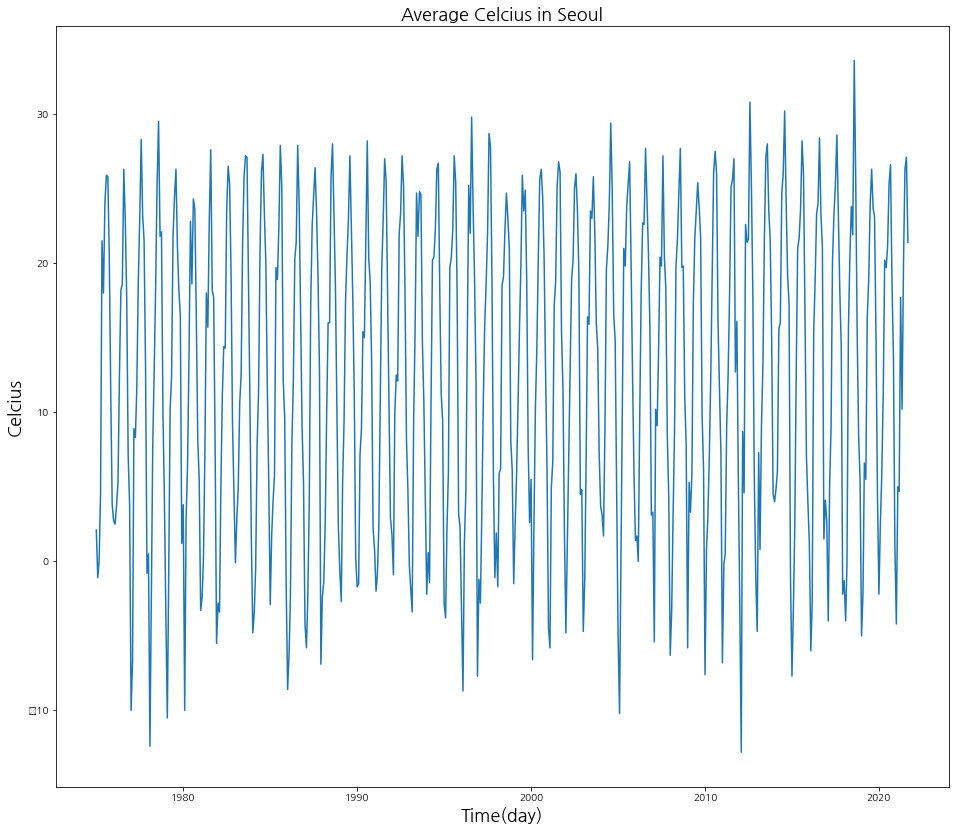

In [10]:
plt.title("Average Celcius in Seoul", fontsize=18)
plt.plot(dff.index, dff)
plt.xlabel('Time(day)', fontsize=18)
plt.ylabel('Celcius', fontsize=18)

In [11]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 11, center = False).mean()
    rol_std = ts.rolling(window = 11, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    
    plt.xlabel('Time(day)', fontsize = 18)
    plt.ylabel('Celcius', fontsize = 18)
    plt.legend(loc='best', fontsize = 18)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 18)
    plt.show(block= True)

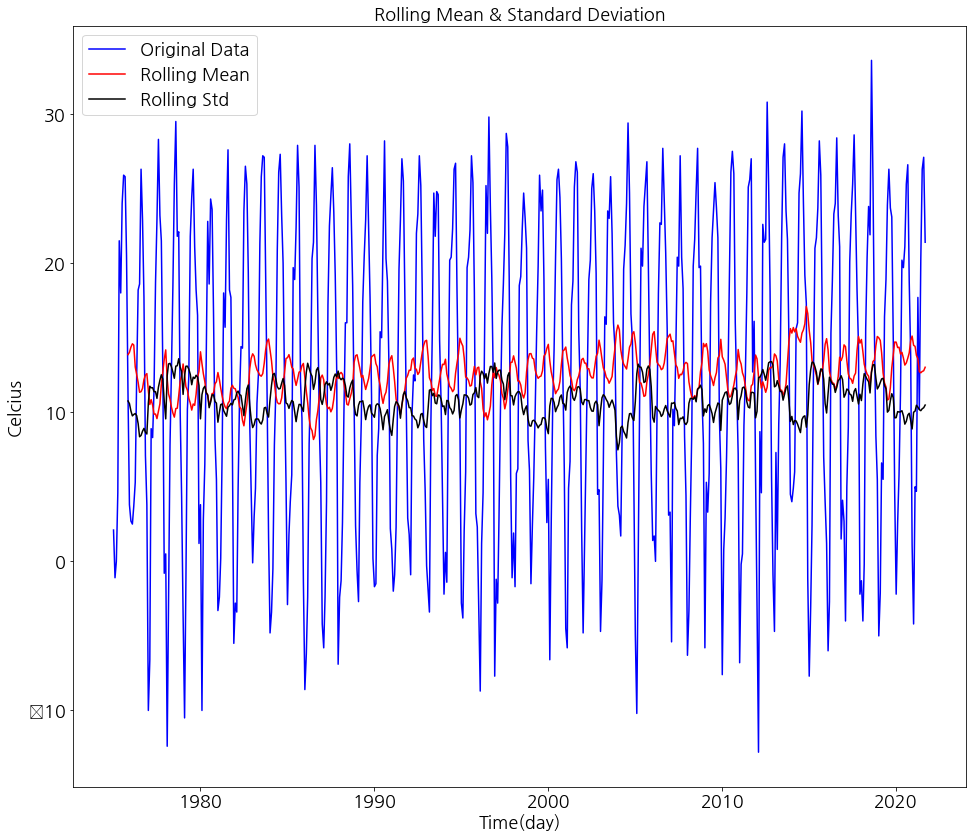

In [12]:
TestStationaryPlot(dff)

In [13]:
def TestStationaryAdfuller(ts, cutoff = 0.05):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
TestStationaryAdfuller(dff)

Test Statistic                  -4.536816
p-value                          0.000169
#Lags Used                      15.000000
Number of Observations Used    545.000000
Critical Value (1%)             -3.442406
Critical Value (5%)             -2.866858
Critical Value (10%)            -2.569602
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


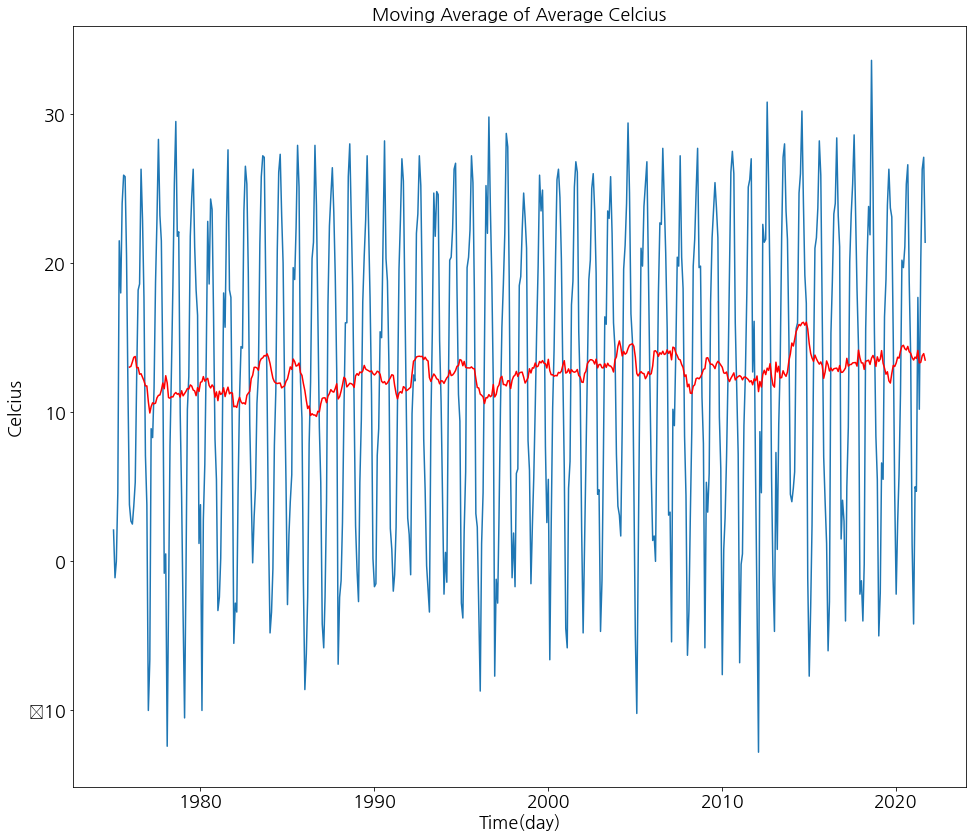

In [15]:
moving_avg = dff.rolling(12).mean()
plt.plot(dff)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Time(day)', fontsize = 18)
plt.ylabel('Celcius', fontsize = 18)
plt.title('Moving Average of Average Celcius', fontsize = 18)
plt.show()

In [16]:
dfff = dff
dfff

,average_c
date,
1975-01-01,2.1
1975-02-01,-1.1
1975-03-01,0.0
1975-04-01,4.6
1975-05-01,21.5
...,...
2021-05-01,10.2
2021-06-01,20.2
2021-07-01,26.3


In [17]:
#Differencing
dfff['sum 1st Diff'] = dff.average_c - dff.average_c.shift(1)
dfff['sum 2nd Diff'] = dfff['sum 1st Diff'] - dfff['sum 1st Diff'].shift(1)

#Seasonal Differencing
dfff['Seasonal Diff'] = dff.average_c - dff.average_c.shift(12)
dfff['Seasonal 1st Diff'] = dfff['Seasonal Diff'] - dfff['Seasonal Diff'].shift(12)

#1st Differncing adfuller test
TestStationaryAdfuller(dfff['sum 1st Diff'].dropna())

#1st Seasonal Differencing 
TestStationaryAdfuller(dfff['Seasonal 1st Diff'].dropna())

Test Statistic                 -20.562816
p-value                          0.000000
#Lags Used                      11.000000
Number of Observations Used    548.000000
Critical Value (1%)             -3.442339
Critical Value (5%)             -2.866829
Critical Value (10%)            -2.569587
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary
Test Statistic                -1.490605e+01
p-value                        1.482379e-27
#Lags Used                     1.100000e+01
Number of Observations Used    5.250000e+02
Critical Value (1%)           -3.442867e+00
Critical Value (5%)           -2.867061e+00
Critical Value (10%)          -2.569710e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


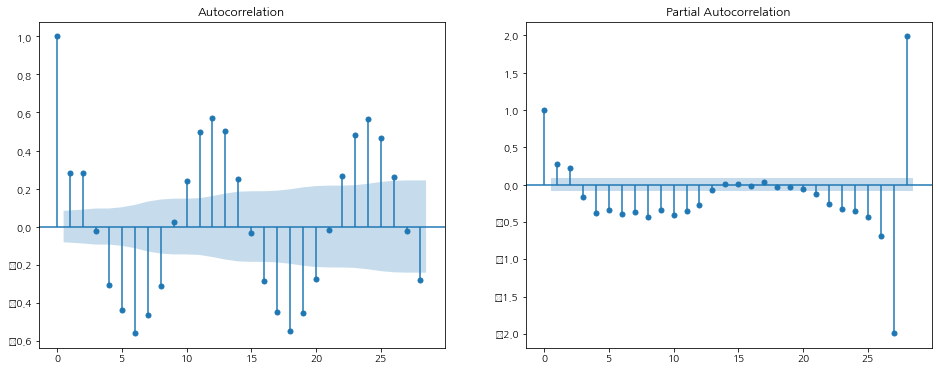

In [18]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(16,6)
ax1 = sm.graphics.tsa.plot_acf(dfff['sum 1st Diff'].dropna(), ax=ax1)
ax2 = sm.graphics.tsa.plot_pacf(dfff['sum 1st Diff'].dropna(), ax=ax2)

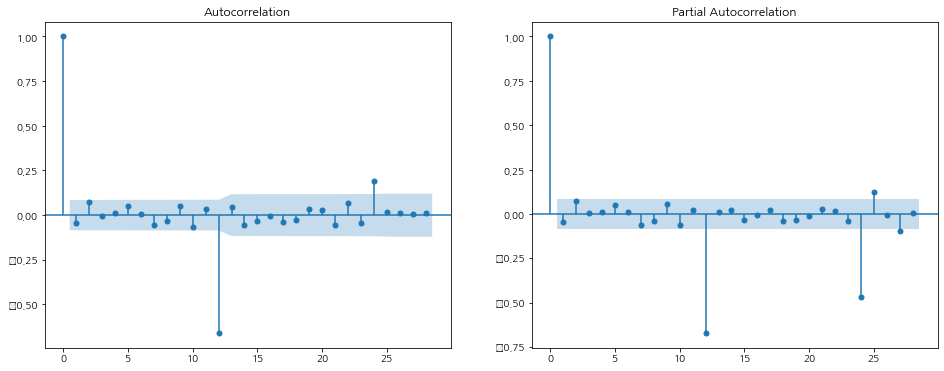

In [19]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(16,6)
ax1 = sm.graphics.tsa.plot_acf(dfff['Seasonal 1st Diff'].dropna(), ax=ax1)
ax2 = sm.graphics.tsa.plot_pacf(dfff['Seasonal 1st Diff'].dropna(), ax=ax2)

In [24]:
dff = dff.average_c
dff

date
1975-01-01     2.1
1975-02-01    -1.1
1975-03-01     0.0
1975-04-01     4.6
1975-05-01    21.5
              ... 
2021-05-01    10.2
2021-06-01    20.2
2021-07-01    26.3
2021-08-01    27.1
2021-09-01    21.4
Name: average_c, Length: 561, dtype: float64

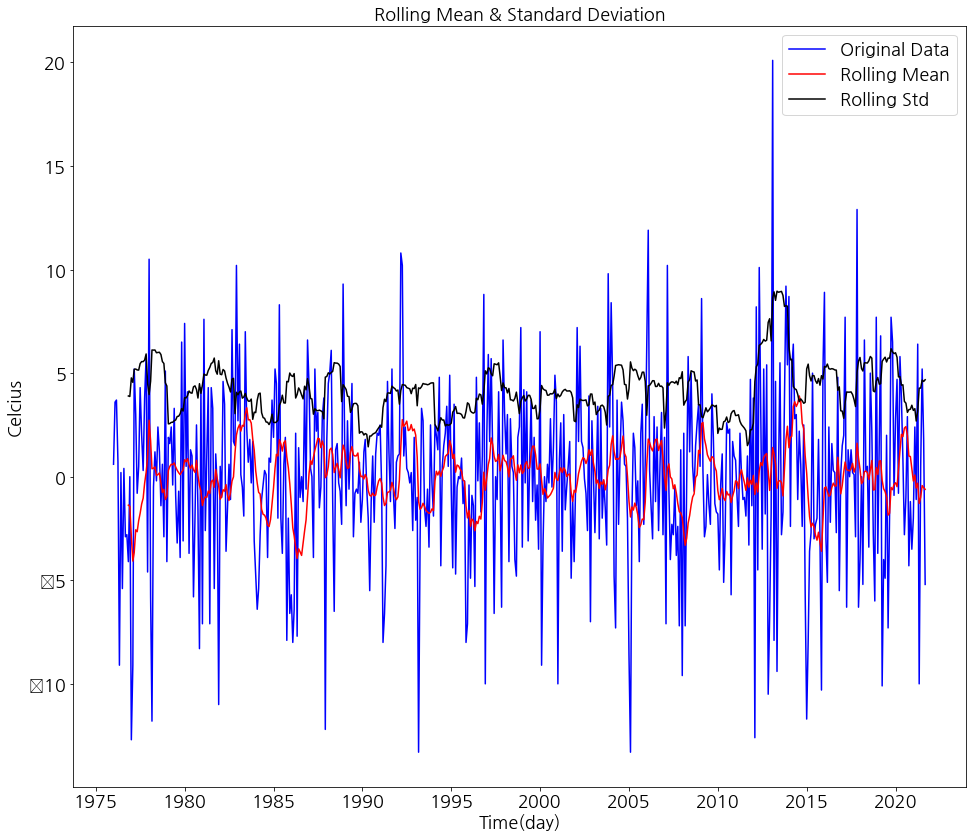

Test Statistic                -1.136378e+01
p-value                        9.334087e-21
#Lags Used                     1.100000e+01
Number of Observations Used    5.370000e+02
Critical Value (1%)           -3.442586e+00
Critical Value (5%)           -2.866937e+00
Critical Value (10%)          -2.569645e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [25]:
dff_seasonal_difference = dff - dff.shift(12)  
TestStationaryPlot(dff_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(dff_seasonal_difference.dropna(inplace=False))

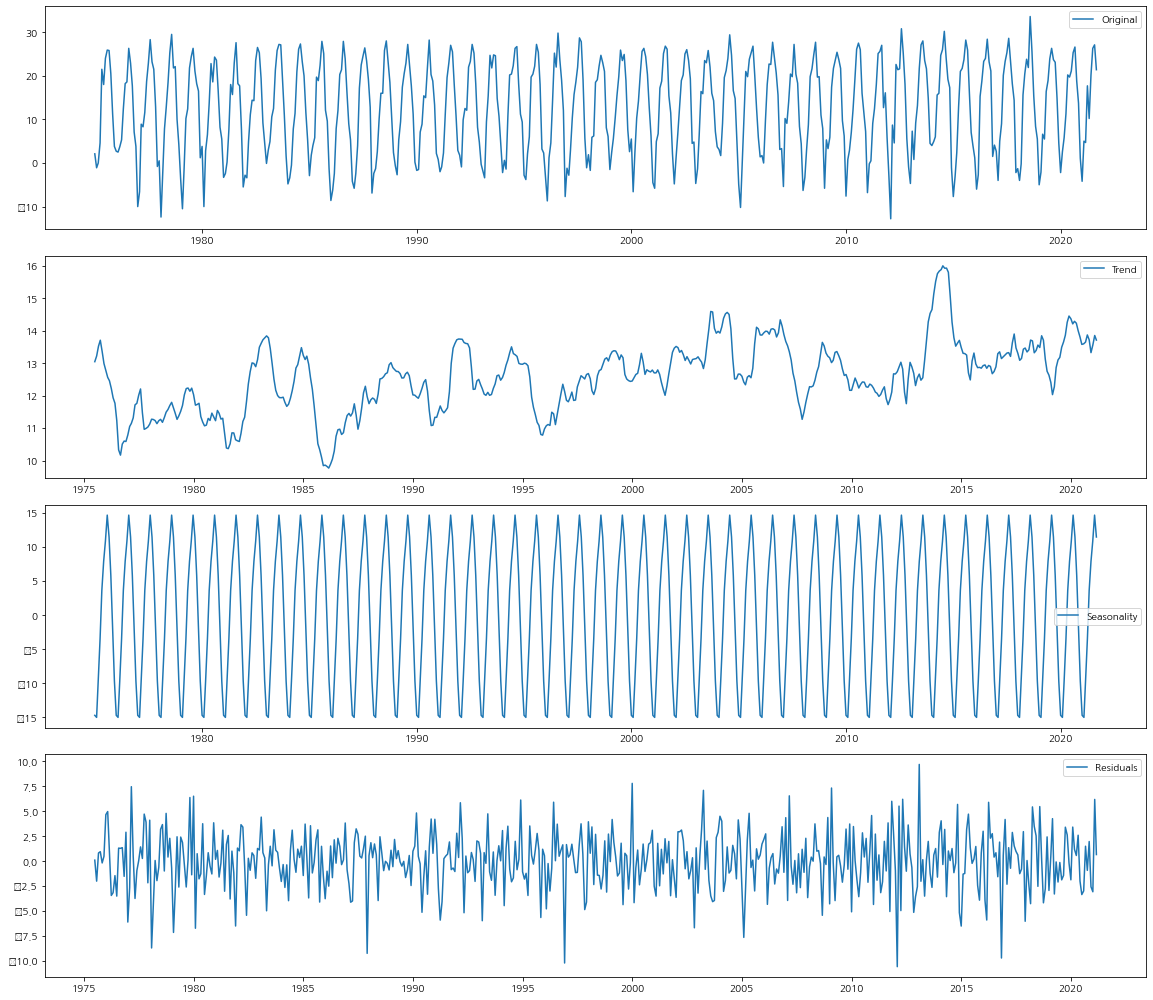

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dff)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

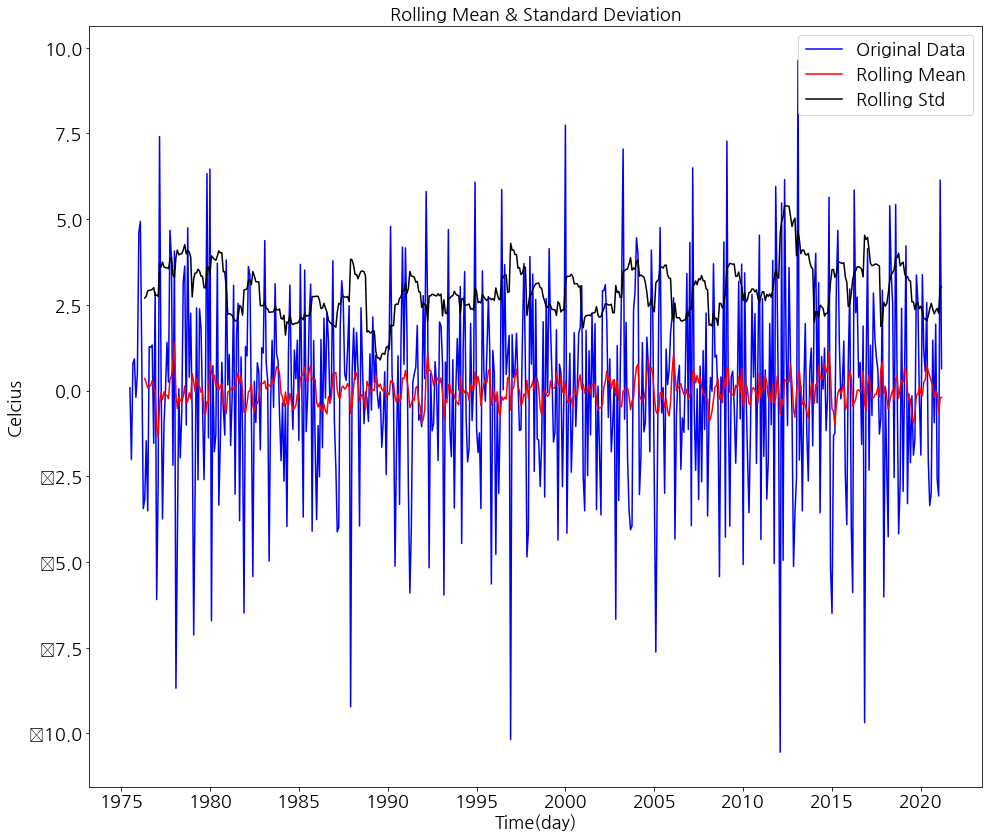

Test Statistic                -1.030052e+01
p-value                        3.381658e-18
#Lags Used                     1.900000e+01
Number of Observations Used    5.290000e+02
Critical Value (1%)           -3.442772e+00
Critical Value (5%)           -2.867019e+00
Critical Value (10%)          -2.569688e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [27]:
dff_decompose = residual
dff_decompose.dropna(inplace=True)
TestStationaryPlot(dff_decompose)
TestStationaryAdfuller(dff_decompose)

In [28]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 11) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 11)
SARIMAX: (0, 1, 0) x (0, 1, 0, 11)


In [29]:
for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(dff_data['sum'],
                                        order=param,
                                        seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}11 - AIC:{} - BIC {}'.format(param, param_seasonal, results.aic, results.bic))
    except:
        continue

In [30]:
mod = sm.tsa.statespace.SARIMAX(dff, 
                                order=(1,1,1), 
                                seasonal_order=(1,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

# result = results.get_prediction(start = 136, end = 160, dynamic=False)

print(results.summary())

c:\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          average_c   No. Observations:                  561
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1379.540
Date:                            Mon, 13 Sep 2021   AIC                           2769.080
Time:                                    11:49:25   BIC                           2790.482
Sample:                                01-01-1975   HQIC                          2777.454
                                     - 09-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0046      0.044     -0.105      0.916      -0.090       0.081
ma.L1         -1.0000     36.485   

In [150]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps=100)
# forecast = results.get_forecast(steps=pd.date_range('20200802', '20230802', freq='M'))
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci

,lower average_c,upper average_c
2021-10-01,13.456699,25.646003
2021-11-01,5.613469,17.802606
2021-12-01,-2.084221,10.104918
2022-01-01,-7.118997,5.070142
2022-02-01,-7.367556,4.820218
...,...,...
2029-09-01,19.312291,31.522313
2029-10-01,13.791959,26.006534
2029-11-01,5.965512,18.180079
2029-12-01,-1.732308,10.482259


In [151]:
from pandas.tseries.offsets import DateOffset
future_dates = [dfff.index[-1] + DateOffset(months=x) for x in range(0,100)]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=dfff.columns)
future_df = pd.concat([dff,future_dates_df])

In [152]:
future_df

,0,Seasonal 1st Diff,Seasonal Diff,average_c,sum 1st Diff,sum 2nd Diff
1975-01-01,2.1,NaN,NaN,NaN,NaN,NaN
1975-02-01,-1.1,NaN,NaN,NaN,NaN,NaN
1975-03-01,0.0,NaN,NaN,NaN,NaN,NaN
1975-04-01,4.6,NaN,NaN,NaN,NaN,NaN
1975-05-01,21.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2029-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2029-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2029-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2029-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
forecast_ci['mean'] = forecast_ci.mean(axis=1)
forecast_ci

,lower average_c,upper average_c,mean
2021-10-01,13.456699,25.646003,19.551351
2021-11-01,5.613469,17.802606,11.708037
2021-12-01,-2.084221,10.104918,4.010348
2022-01-01,-7.118997,5.070142,-1.024427
2022-02-01,-7.367556,4.820218,-1.273669
...,...,...,...
2029-09-01,19.312291,31.522313,25.417302
2029-10-01,13.791959,26.006534,19.899246
2029-11-01,5.965512,18.180079,12.072796
2029-12-01,-1.732308,10.482259,4.374975


In [154]:
con = pd.concat([dfff,forecast_ci])

In [155]:
con = con[['average_c', 'lower average_c', 'upper average_c', 'mean']]
con

,average_c,lower average_c,upper average_c,mean
1975-01-01,2.1,NaN,NaN,NaN
1975-02-01,-1.1,NaN,NaN,NaN
1975-03-01,0.0,NaN,NaN,NaN
1975-04-01,4.6,NaN,NaN,NaN
1975-05-01,21.5,NaN,NaN,NaN
...,...,...,...,...
2029-09-01,NaN,19.312291,31.522313,25.417302
2029-10-01,NaN,13.791959,26.006534,19.899246
2029-11-01,NaN,5.965512,18.180079,12.072796
2029-12-01,NaN,-1.732308,10.482259,4.374975


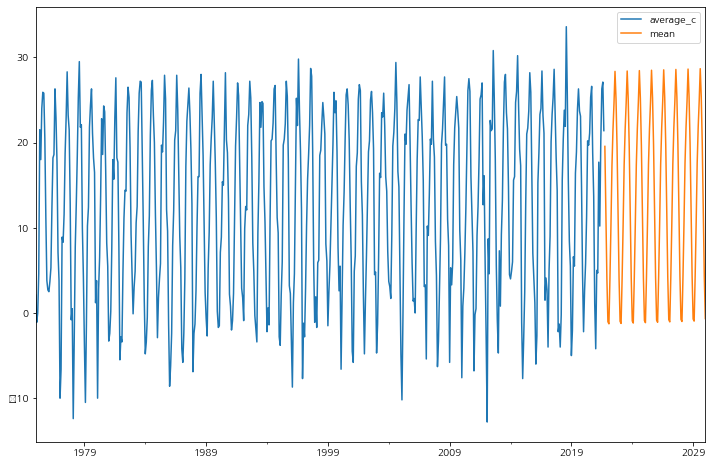

In [156]:
con[['average_c', 'mean']].plot(figsize=(12, 8)) 
ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2019-05-31'), 
                 con['average_c'].index[-1],
                 alpha=.1, zorder=-1)

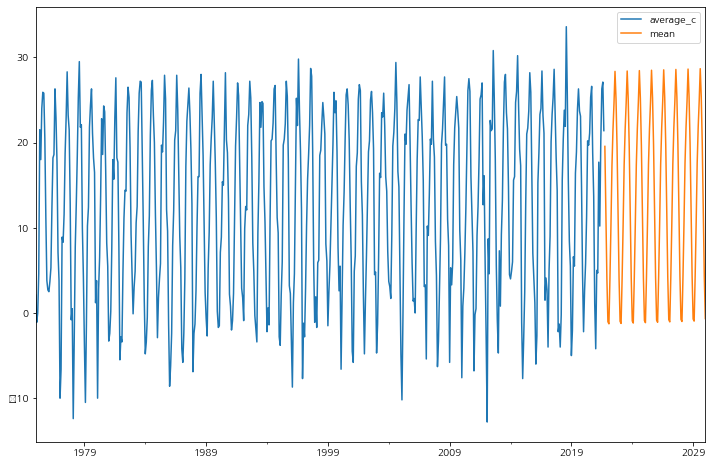

In [157]:
con[['average_c', 'mean']].plot(figsize=(12, 8)) 
ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2021-01-01'), 
                 con['average_c'].index[-1],
                 alpha=.1, zorder=-1)
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)

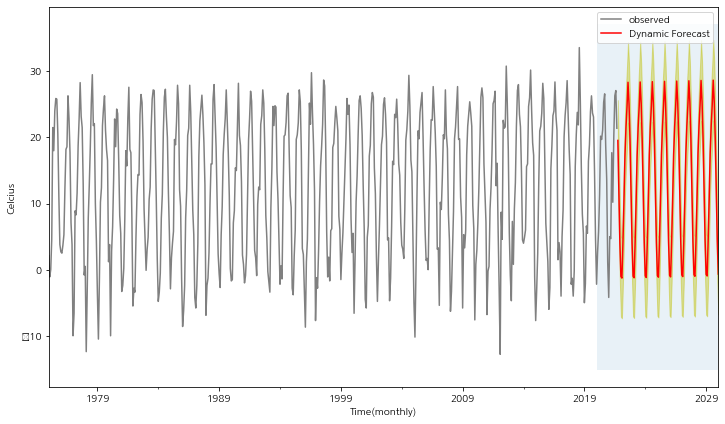

In [207]:
ax = con['average_c'].plot(label='observed',figsize=(12, 7), color='gray')
# ax = con['average_c'].plot(label='observed',figsize=(12, 8), color='gray')
con['mean'].plot(label='Dynamic Forecast', color='r', ax=ax)

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='y', alpha=.4)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2020-01-01'), 
                 con['average_c'].index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time(monthly)')
ax.set_ylabel('Celcius')

plt.legend()
plt.show()

In [148]:
line = trend[[12, 548]]

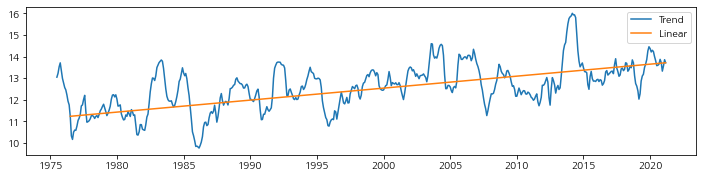

In [149]:
plt.subplot(211)
plt.plot(trend, label='Trend')
plt.plot(line, label='Linear')
plt.legend(loc='best')

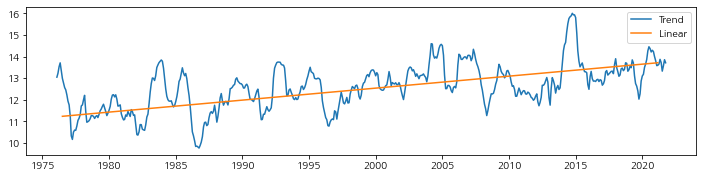

In [168]:
plt.subplot(211)
plt.plot(con.index[13:], trend_a[0].values, label='Trend')
plt.plot(line, label='Linear')
plt.legend(loc='best')

In [160]:
from pandas.tseries.offsets import DateOffset
future_dates = [dfff.index[-1] + DateOffset(months=x) for x in range(0,100)]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=dfff.columns)
trend_a = pd.concat([trend,future_dates_df])

In [166]:
trend_a[0]

1975-07-01    13.050000
1975-08-01    13.225000
1975-09-01    13.529167
1975-10-01    13.712500
1975-11-01    13.362500
                ...    
2029-08-01          NaN
2029-09-01          NaN
2029-10-01          NaN
2029-11-01          NaN
2029-12-01          NaN
Name: 0, Length: 648, dtype: float64

In [175]:
con['average_c'][0:561]

1975-01-01     2.1
1975-02-01    -1.1
1975-03-01     0.0
1975-04-01     4.6
1975-05-01    21.5
              ... 
2021-05-01    10.2
2021-06-01    20.2
2021-07-01    26.3
2021-08-01    27.1
2021-09-01    21.4
Name: average_c, Length: 561, dtype: float64

In [178]:
con['mean'][561:661]

2021-10-01    19.551351
2021-11-01    11.708037
2021-12-01     4.010348
2022-01-01    -1.024427
2022-02-01    -1.273669
                ...    
2029-09-01    25.417302
2029-10-01    19.899246
2029-11-01    12.072796
2029-12-01     4.374975
2030-01-01    -0.659803
Name: mean, Length: 100, dtype: float64

In [180]:
merge = pd.concat([con['average_c'][0:561],con['mean'][561:661]])

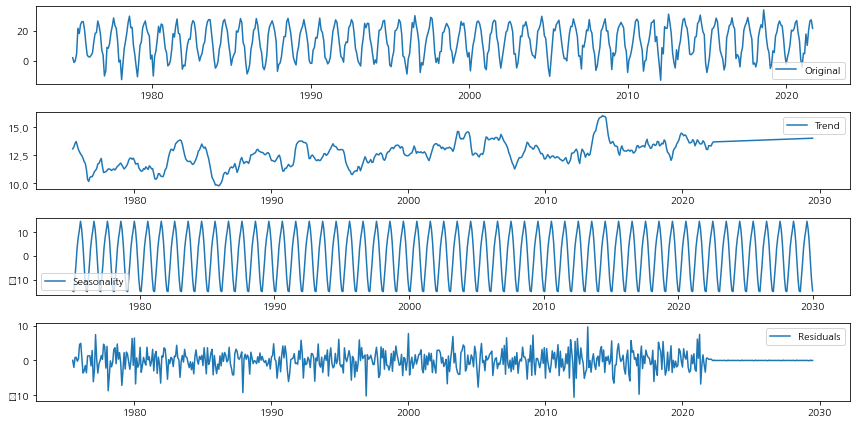

In [181]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(merge)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [202]:
line = trend[[18, 650]]

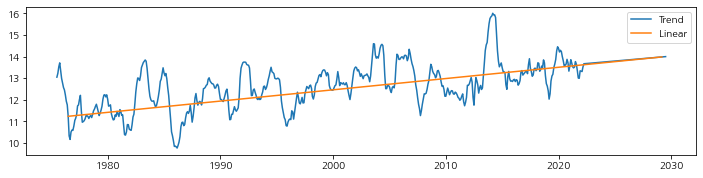

In [204]:
plt.subplot(211)
plt.plot(trend, label='Trend')
plt.plot(line, label='Linear')
plt.legend(loc='best')